<a href="https://colab.research.google.com/github/Bikomwangi/Week.13.Project/blob/main/Part_1_Biko_Mwangi_Advertising_Online_Cryptography_R_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cat(system('python3 -c "from google.colab import drive\ndrive.mount()"', intern=TRUE), sep='\n', wait=TRUE)

Warning message in system("python3 -c \"from google.colab import drive\ndrive.mount()\"", :
“running command 'python3 -c "from google.colab import drive
drive.mount()"' had status 1”



TRUE


In [2]:
?system

In [3]:
install.packages("rgl", repos = "http://cran.rstudio.com/")
install.packages("ConsRank", repos = "http://cran.rstudio.com/")
library("ConsRank")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘fastmap’, ‘miniUI’, ‘webshot’, ‘shiny’, ‘manipulateWidget’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘XML’, ‘rlist’, ‘proxy’, ‘gtools’


Loading required package: rgl

Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”
Warning message:
“'rgl.init' failed, running with 'rgl.useNULL = TRUE'.”

Attaching package: ‘ConsRank’


The following object is masked from ‘package:base’:

    labels




In [4]:
system("add-apt-repository -y ppa:marutter/rrutter")
system("add-apt-repository -y ppa:marutter/c2d4u")
system("apt-get update")
system("apt install -y r-cran-rstan")

# Defining The Question

- Determine the most important characteristics of who is more likely to click on the online cryptography course ADs

# The Metrics for Success

- Successful Univariate and Bivariate analysis and Identification of the features that are likely to be inclined to people who click on the Ads

# The Context

- A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. I am to employ EDA in R programming and help her identify which individuals are most likely to click on her ads.

# Experimental Design


- Find and deal with outliers, anomalies, and missing data within the dataset.
- Perform univariate and bivariate analysis.
- Supervised learning modelling
- Provide a conclusion and recommendation from the insights.

# Importing R packages

In [6]:
library(tidyverse) #metapackage with multiple functions
load.libraries <- c('data.table', 'corrplot', 'ggplot2')
install.lib <- load.libraries[!load.libraries %in% installed.packages()]
for(libs in install.lib) install.packages(libs, dependences = TRUE)
sapply(load.libraries, require, character = TRUE)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: corrplot

corrplot 0.84 loaded



data.table   corrplot    ggplot2 
      TRUE       TRUE       TRUE

# Loading and Exploring the Data

In [7]:
#loading the advertising dataset
df<-read.csv("/content/advertising.csv", dec=".", sep=",", header=T)


In [8]:
#previewing the top six rows of our dataset
head(df)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [9]:
# checking the column names
colnames(df)

[1] "Daily.Time.Spent.on.Site" "Age"                     
 [3] "Area.Income"              "Daily.Internet.Usage"    
 [5] "Ad.Topic.Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked.on.Ad"

In [10]:
# checking the size of the dataset
print(nrow(df))
print(ncol(df))

[1] 1000
[1] 10


In [11]:
#checking the bottom 5 rows
tail(df, 5)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
996,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
997,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
998,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
999,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
1000,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [12]:
#checking the column data types
str(df)

'data.frame':	1000 obs. of  10 variables:
 $ Daily.Time.Spent.on.Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area.Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily.Internet.Usage    : num  256 194 236 246 226 ...
 $ Ad.Topic.Line           : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : chr  "2016-03-27 00:53:11" "2016-04-04 01:39:02" "2016-03-13 20:35:42" "2016-01-10 02:31:19" ...
 $ Clicked.on.Ad           : int  0 0 0 0 0 0 0 1 0 0 ...


In [13]:
# obtaining the statistical summary of the numeric columns
summary(df)

 Daily.Time.Spent.on.Site      Age         Area.Income    Daily.Internet.Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
 Ad.Topic.Line          City                Male         Country         
 Length:1000        Length:1000        Min.   :0.000   Length:1000       
 Class :character   Class :character   1st Qu.:0.000   Class :character  
 Mode  :character   Mode  :character   Median :0.000   Mode  :character  
                                       Mean   :0.481                     
                                       3rd Qu.:1.000                     
   

# Data Cleaning

In [15]:
# checking for missing values
colSums(sapply(df, is.na))

Daily.Time.Spent.on.Site                      Age              Area.Income 
                       0                        0                        0 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked.on.Ad 
                       0

The number of missing values in each column is 0

In [16]:
# checking for duplicated rows
cat("The number of duplicated rows are", nrow(df) - nrow(unique(df)))

The number of duplicated rows are 0

The dataset has no duplicated rows

In [17]:
# changing the names of some variables to make it easier to write codes
df<-df %>% 
  rename(
    Time=Daily.Time.Spent.on.Site,
    Income=Area.Income,
    Internet=Daily.Internet.Usage,
    Ad=Clicked.on.Ad
  )
names(df)
str(df)
head(df)
attach(df)

[1] "Time"          "Age"           "Income"        "Internet"     
 [5] "Ad.Topic.Line" "City"          "Male"          "Country"      
 [9] "Timestamp"     "Ad"

'data.frame':	1000 obs. of  10 variables:
 $ Time         : num  69 80.2 69.5 74.2 68.4 ...
 $ Age          : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Income       : num  61834 68442 59786 54806 73890 ...
 $ Internet     : num  256 194 236 246 226 ...
 $ Ad.Topic.Line: chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City         : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male         : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country      : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp    : chr  "2016-03-27 00:53:11" "2016-04-04 01:39:02" "2016-03-13 20:35:42" "2016-01-10 02:31:19" ...
 $ Ad           : int  0 0 0 0 0 0 0 1 0 0 ...


,Time,Age,Income,Internet,Ad.Topic.Line,City,Male,Country,Timestamp,Ad
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


# Univariate Data Analysis

**Daily.Time.Spent.on.Site**





   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  32.60   51.36   68.22   65.00   78.55   91.43 

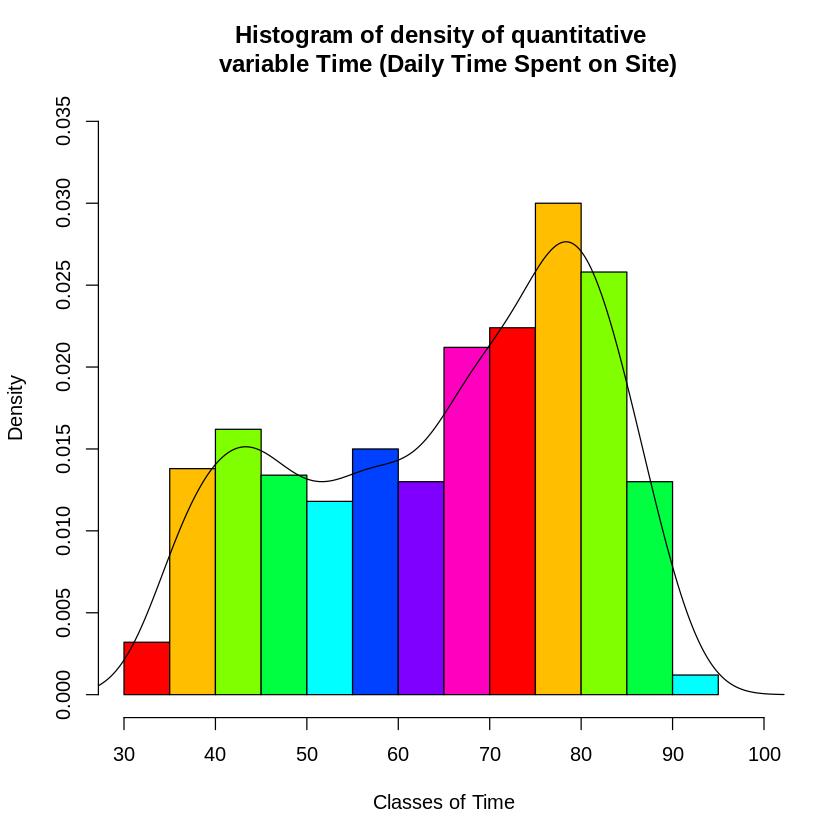

In [19]:
# exploring Time
summary(Time)
hist(Time,prob=T,col=rainbow(8),ylim=c(0,0.035),xlim=c(30,100),xlab="Classes of Time",
  ylab="Density",main="Histogram of density of quantitative \n variable Time (Daily Time Spent on Site)")
lines(density(Time)) 


Insights;
- we can see that this variable has a bimodal distribution with one peak being higher than the other one. The highest class of time is from 65 - 85 

**Area.Income**

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13996   47032   57012   55000   65471   79485 

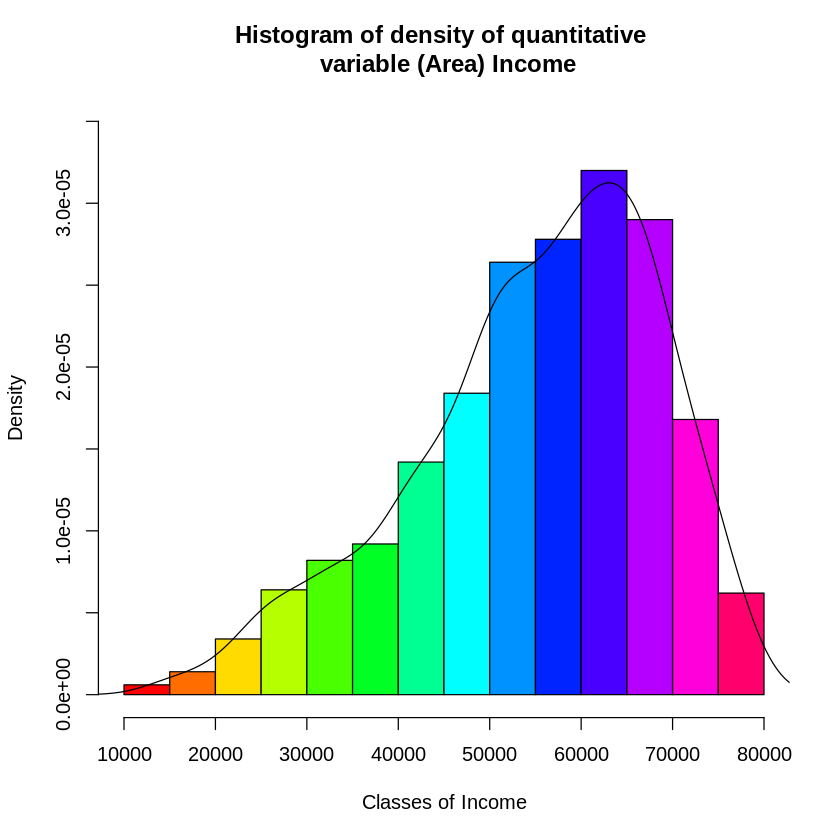

In [20]:
# exploring income variable
summary(Income)
hist(Income,prob=T,col=rainbow(14),ylim=c(0,0.000035),xlim=c(10000,80000),xlab="Classes of Income",
  ylab="Density",main="Histogram of density of quantitative \n variable (Area) Income")
lines(density(Income))

Insights;
- Area.income has a non normal distribution that is negatively skewed. Majority are have an income of 50000 - 70000

**Daily.Internet.Usage**

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.8   138.8   183.1   180.0   218.8   270.0 

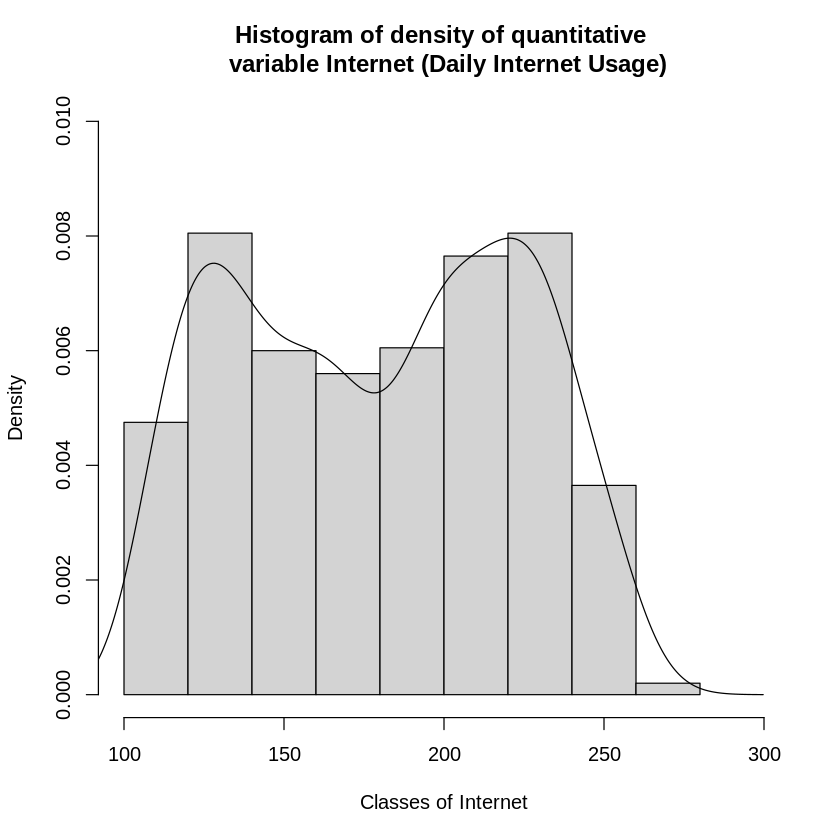

In [21]:
#Internet
summary(Internet)
hist(Internet,prob=T,ylim=c(0,0.01),xlim=c(100,300),xlab="Classes of Internet",
  ylab="Density",main="Histogram of density of quantitative \n variable Internet (Daily Internet Usage)")
lines(density(Internet)) #bimodal distribution
#qqnorm(Internet,main="Normal Q-Q Plot of quantitative variable Internet")
#qqline(Internet) #non-normal distribution

Insights; 
- daily internet usage has a bimodal distribution

**Age**

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.00   29.00   35.00   36.01   42.00   61.00 

Age
19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 
 6  6  6 13 19 21 27 37 33 48 48 39 60 38 43 39 39 50 36 37 30 36 32 26 23 21 
45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 
30 18 13 16 18 20 12 15 10  9  7  2  6  4  2  4  1 

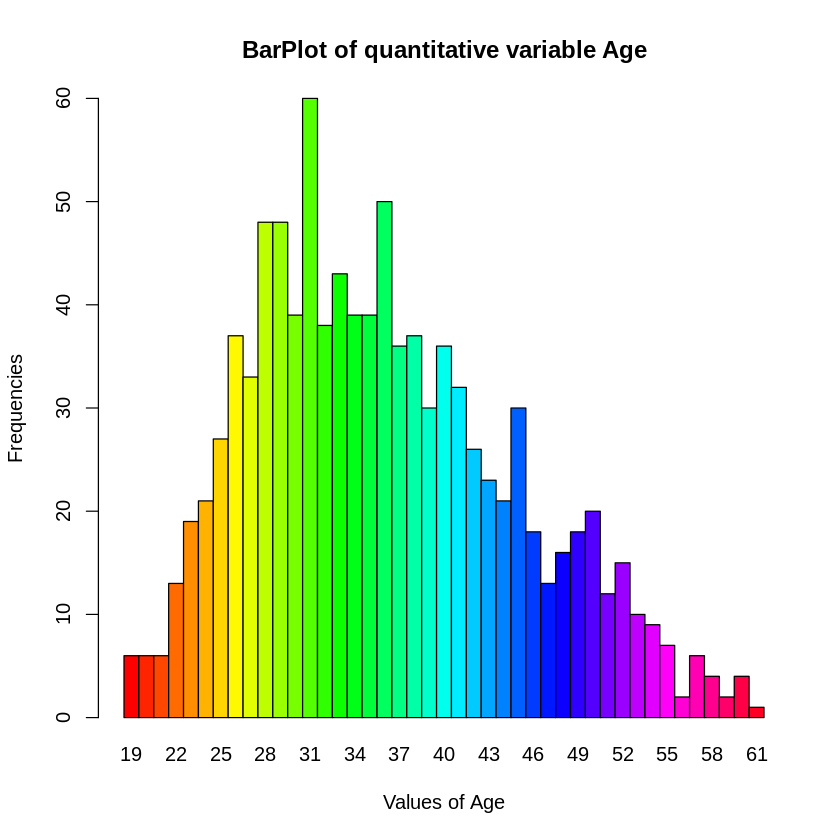

In [22]:
# exploring Age
summary(Age)
table(Age)
m<-max(table(Age))
barplot(table(Age),space=F,col=rainbow(43),ylim=c(0,m),xlab="Values of Age",
  ylab="Frequencies",main="BarPlot of quantitative variable Age") #positively skewed distribution

Insights; 
- Age has a positively skewed distribution. The average age of the people clicking on the ADs is 36 or rather 20 and above

**Clicked.on.Ad**

Ad
  0   1 
500 500 

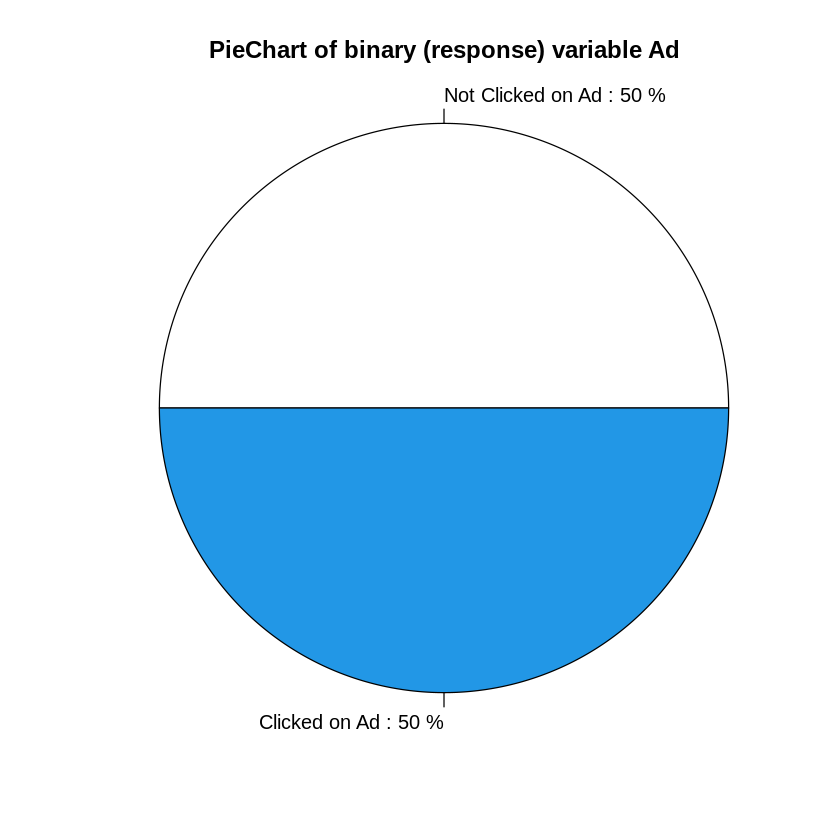

In [23]:
# exploring Ad
table(Ad)
perc<-round(table(Ad)/length(Ad),digit=3)*100
lab<-c("Not Clicked on Ad","Clicked on Ad")
labs<-paste(lab,":",perc,"%")
pie(table(Ad),col=c(0,4),labels=labs,radius=1,edges=1000,
  main="PieChart of binary (response) variable Ad")

Insights;
- we can see that the people who clicked on the Ad are equal to the people who did not click on the Ad

**Male**

Male
  0   1 
519 481 

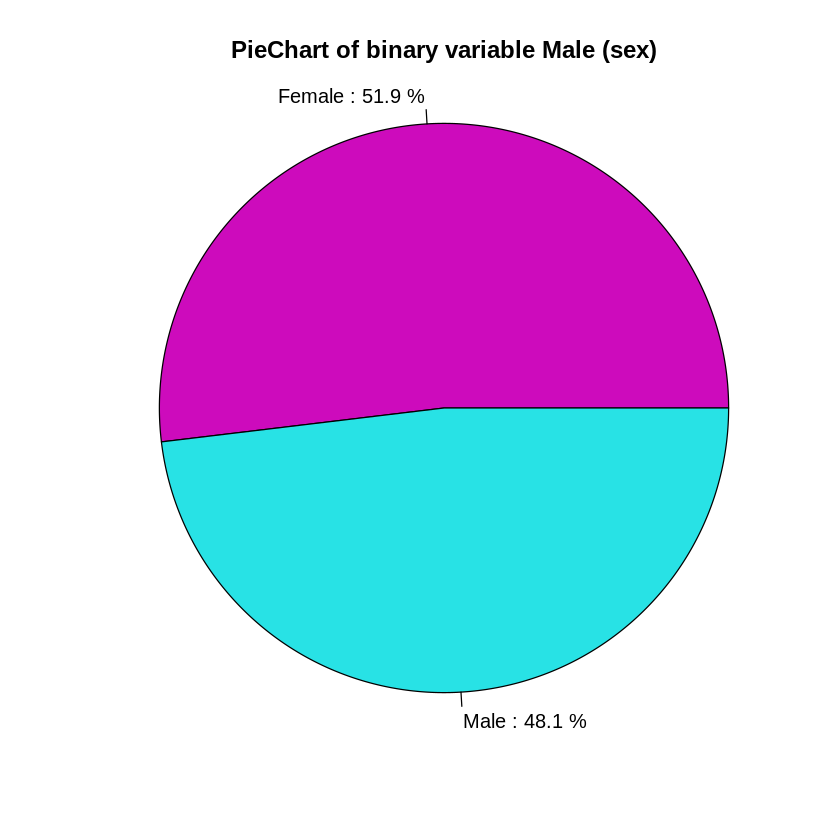

In [24]:
# exploring the Male column
table(Male)
perc1<-round(table(Male)/length(Male),digit=3)*100
lab1<-c("Female","Male")
labs2<-paste(lab1,":",perc1,"%")
pie(table(Male),col=c(6,5),labels=labs2,radius=1,
  edges=1000,main="PieChart of binary variable Male (sex)")


Insights; The female gender constitutes the majority although the difference is not significant

# Bivariate Analysis

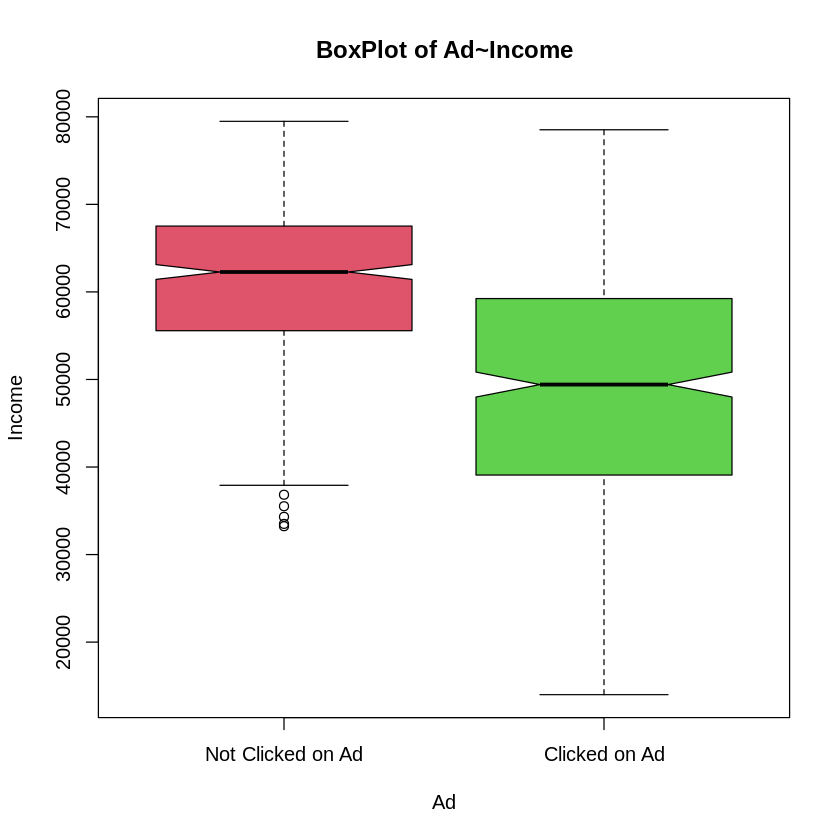

In [26]:
# Clicked.on.Ad vs income
boxplot(Income~Ad,data=df,notch=T,main="BoxPlot of Ad~Income",col=c(2,3),
  names=c("Not Clicked on Ad","Clicked on Ad"))

Insights;
- The medians between the two differ significantly
- Majority of the people who clicked on the Ad had an average income

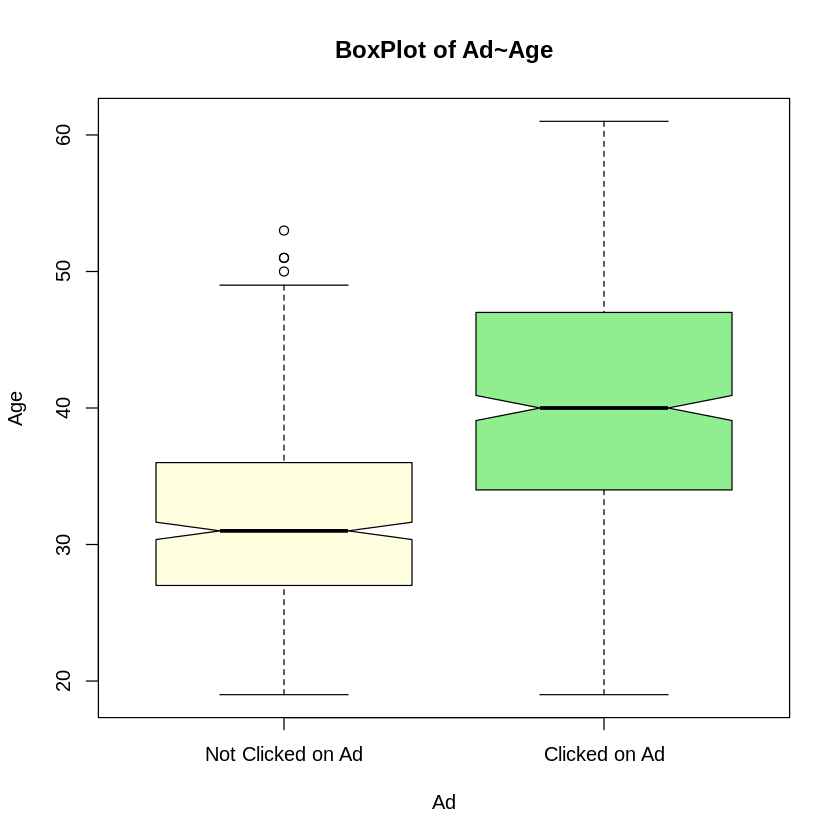

In [27]:
#Ad vs Age
boxplot(Age~Ad,data=df,notch=T,main="BoxPlot of Ad~Age",col=c("lightyellow","lightgreen"),
  names=c("Not Clicked on Ad","Clicked on Ad"))

Insights;
- Most people who click on Ads are in the average age range

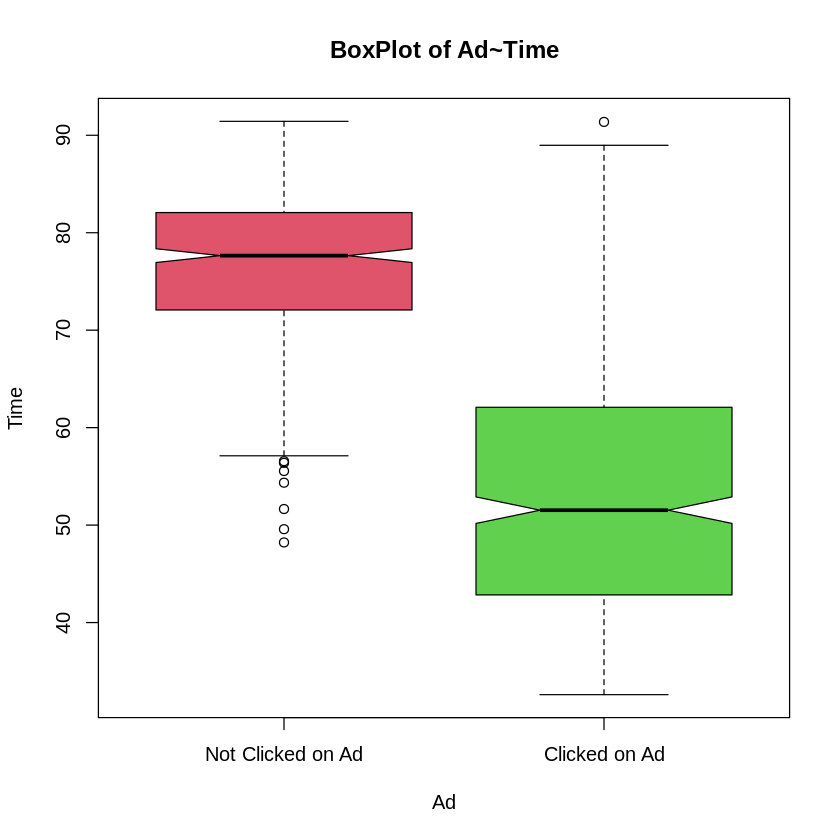

In [28]:
# clicked.on.Ad vs time
boxplot(Time~Ad,data=df,notch=T,main="BoxPlot of Ad~Time",col=c(2,3),
  names=c("Not Clicked on Ad","Clicked on Ad"))

Insights;
- the medians of the two significantly classes differ
- people who clicked on the Ad seem to spend lesser time on the site and, most people who spend alot of time on site tend not to click on the Ad


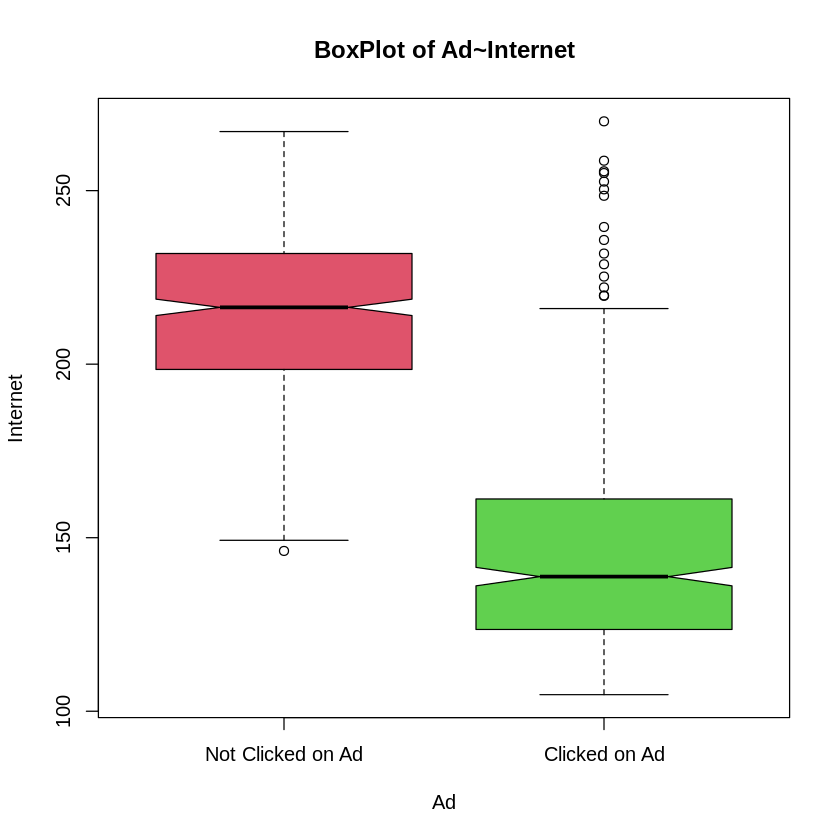

In [29]:
# daily internet usage vs clicked.on.AD
boxplot(Internet~Ad,data=df,notch=T,main="BoxPlot of Ad~Internet",col=c(2,3),
  names=c("Not Clicked on Ad","Clicked on Ad"))


Insights; 
- The medians differ significantly
- people who clicked on the Ad had a lower daily internet usage as compared to those who did not click on the Ad

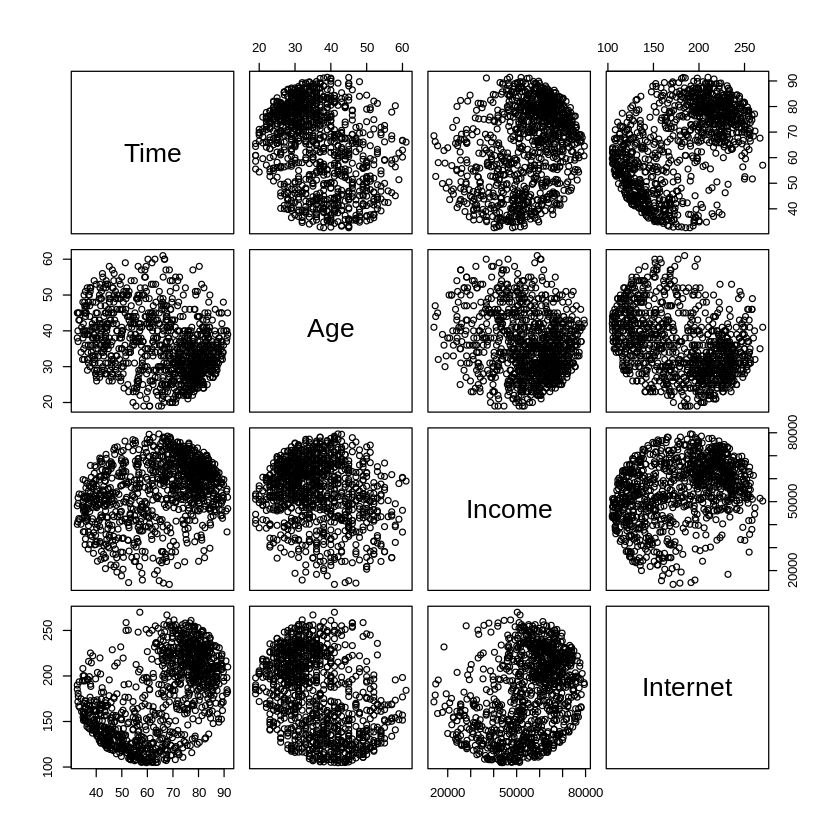

In [30]:
#Searching for a possible multicollinearity
plot(df[,1:4]) 

Insights;
- It seems that there is no linear relations among the above variables

,Time,Age,Income,Internet
Time,1.0000000,-0.3315133,0.3109544,0.5186585
Age,-0.3315133,1.0000000,-0.1826050,-0.3672086
Income,0.3109544,-0.1826050,1.0000000,0.3374955
Internet,0.5186585,-0.3672086,0.3374955,1.0000000


Time,Age,Income,Internet
-0.01592213,-0.02315468,-0.01436909,0.02820432


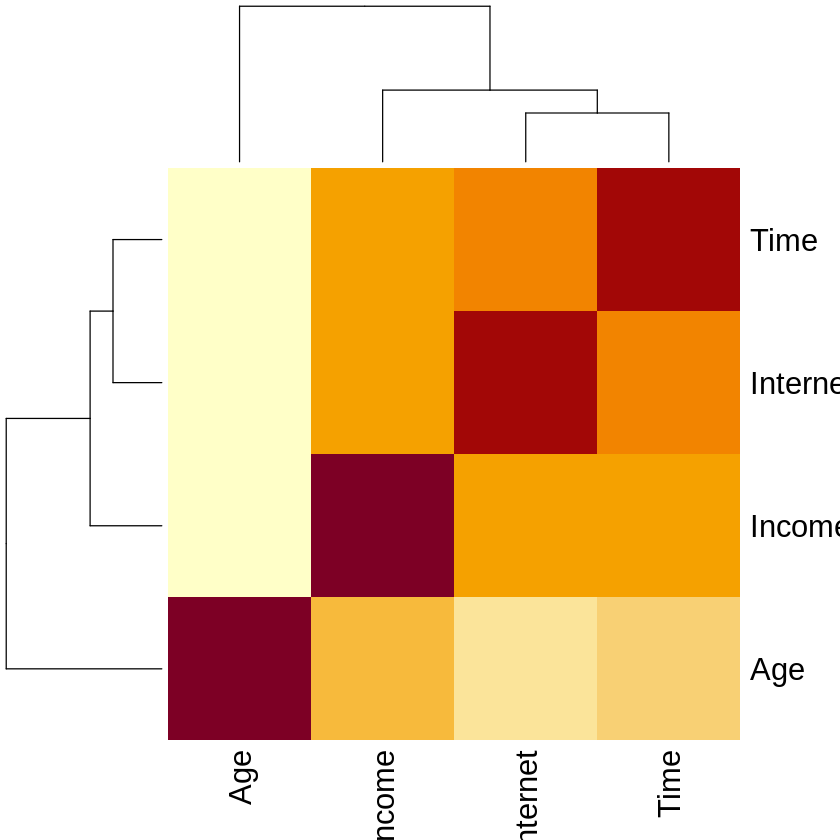

In [31]:
# correlation matrix
(corrm<-cor(df[,1:4],method="pearson"))
heatmap(corrm)
cor(Male,df[,1:4],method="spearman")

Insights;
- we can see that the correlations are low with the highest being 0.5186 which is a correlation between daily.time.spent.on.internet and Daily.internet.usage

In [32]:
# Corr. between Ad~Time
cor(Ad,Time,method="spearman") 

[1] -0.7448725

This is quite a high -ve correlation between Ad and time spent on site

In [33]:
#Ad~Age
cor(Ad,Age,method="spearman") 

[1] 0.4863373

Ad and Age have a medium positive level correlation

In [34]:
#Ad~Income
cor(Ad,Income,method="spearman") 

[1] -0.4672244

Ad and Income have a medium level -ve correlation

In [35]:
#Ad~Internet
cor(Ad,Internet,method="spearman") 

[1] -0.776607

Ad and internet have a high negative correlation

# Supervised Learning Model

**Random Forest**

In [36]:
#Importing the libraries
library(xgboost) # for xgboost
library(tidyverse) # general utility functions
library(randomForest) #randomforest
library(Metrics)
library(caret)


Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:Metrics’:

    precision, recall


The following object is masked from ‘package:purrr’:

    lift




In [49]:
#install.packages("randomForest")
#install.packages("xgboost")
#install.packages("Metrics")
#install.packages("caret")
#install.packages("caTools")
#install.packages("e1071")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [42]:
# split data into testing & training
set.seed(1234)
require(caTools)
library(tidyverse)
# 80-20 train/test split 
training_indexs <- createDataPartition(df$Ad, p = .2, list = F)
training <- df[training_indexs, ]
testing  <- df[-training_indexs, ]

Loading required package: caTools



In [43]:
# get predictors
predictors <- training %>% select(-c(Ad, Ad.Topic.Line, Timestamp,City,Country)) %>% as.matrix()
output <- training$Ad %>% as.factor()
str(output)
class(output)

 Factor w/ 2 levels "0","1": 1 1 2 2 2 1 2 2 2 1 ...


[1] "factor"

In [44]:
# train a random forest model for Classification
model <- randomForest(x = predictors, y = output,
                      ntree = 50) # number of trees

# check out the details
model


Call:
 randomForest(x = predictors, y = output, ntree = 50) 
               Type of random forest: classification
                     Number of trees: 50
No. of variables tried at each split: 2

        OOB estimate of  error rate: 6%
Confusion matrix:
   0  1 class.error
0 96  4        0.04
1  8 92        0.08

In [50]:
# use caret to pick a value for mtry
#require(e1071)
tuned_model <- train(x = predictors, y = output,
                     ntree = 5, # number of trees (passed on random forest)
                     method = "rf") # random forests

tuned_model

Random Forest 

200 samples
  5 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 200, 200, 200, 200, 200, 200, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.9216173  0.8421784
  3     0.9311283  0.8611447
  5     0.9232241  0.8455184

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 3.

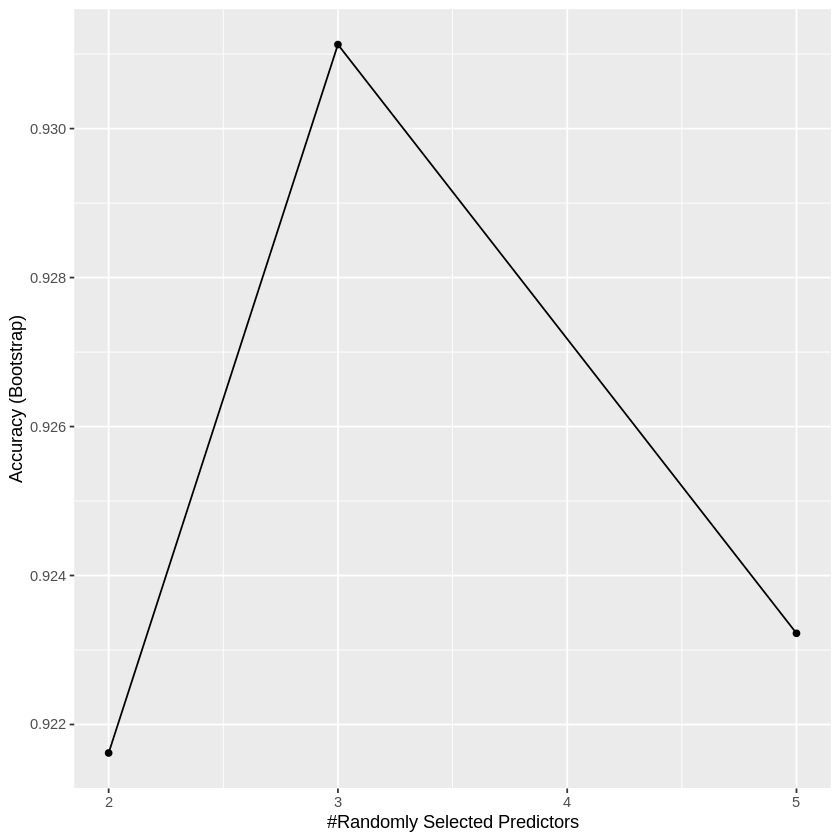

In [51]:
# plot the rmse for various possible training values
ggplot(tuned_model)


Call:
 randomForest(x = x, y = y, ntree = 5, mtry = param$mtry) 
               Type of random forest: classification
                     Number of trees: 5
No. of variables tried at each split: 3

        OOB estimate of  error rate: 8.74%
Confusion matrix:
   0  1 class.error
0 79 10  0.11235955
1  6 88  0.06382979

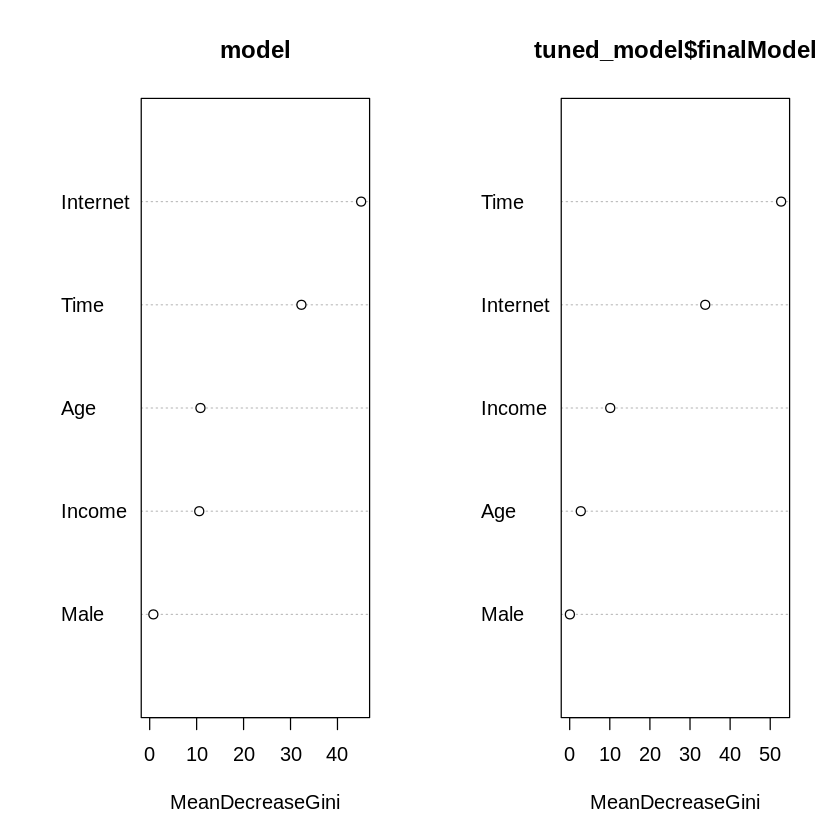

In [52]:
# plotting both plots at once
par(mfrow = c(1,2))

varImpPlot(model, n.var = 5)
varImpPlot(tuned_model$finalModel, n.var = 5)
tuned_model$finalModel

# Conclusion

Above are the dominant features our model is predicting so our target population are the people:

- Who Spends less time on the internet
- Who spends less time on the website
- Who has lower income
- Who are older than our average sample (mean around 40 years old)

# Recommendation 

We should look for more data mostly on the online behavior and intent of people loading the website. This is by looking at historical data of these people. This is to maybe discover why people are spending alot of time on the site and end up not clicking on the Ads.